# Principal component analysis
Machine learning in general works wonders when the dataset provided for training the machine is large and concise. Usually having a good amount of data lets us build a better predictive model since we have more data to train the machine with. However, using a large dataset has its own pitfalls. The biggest pitfall is the curse of dimensionality. 

It turns out that in large dimenstional datasets, there might be lots of inconsistencies in the features or lots of redundant featurs in the dataset, which only will increase the computation time and make data processing and EDA more convoluted. 

To get rid of the curse of dimensionality, a process called dimensionality reduction was introduced. Dimensionality reduction techniques can be used to filter only in a limited number of significant features needed for training and this is where PCA comes in. 

## What is PCA?
Principal Components Analysis (PCA) is dimensionality reduction technique that enables you to identify correlations and patters in a data set so that it can be transofmred into a data set of significantly lower dimension without loss of any important information. 

## Step-by-Step Computation of PCA
The below steps need to be followed to perform dimensionality reduction using PCA:

- Standardization of the data
- Computing the covariance matrix
- Calculating the eigenvectors and eigenvalues
- Computing the Principal Components
- Reducing the dimensions of the data set

Here are all the steps in detail: 

### Step 1: Standardization of the data 
Standardization is all about scaling your data in such a way that all the variables and their values lie within a similar range. 

Consider an example, let's say that we have 2 variables in a our data set, one has values ranging between 0 - 100 and the other has values between 1,000 - 5,000. In such a scenario, it is obvious that the output calculated by using these predictor variables is going to be biased since the variable with a larger range will have a more obvious impact on the outcome. 

Therefore, standardizing the data into a comparable range is very important. Standardization is carried out by subtracting each value in the data from the mean and dividing it by the overall deviation in the data set. 

It can be calculated like so:

Z = (Variable value - mean)/Standard deviation
                
Post this step, all the variables in the data are scaled across a standard and comparable scale. 

### Step 2: Computing the covariance matrix
As mentioned earlier, PCA helps to identify the correlation and dependencies among the features in a data set. A covariance matrix expresses the correlation between the different variables in the data set. It is essential to identify heavily dependent variables because they contain biased and redundant information which reduces the overall performance of the model. 

Mathematically, a covariance matrix is a p x p matrix, where p represents the dimensions of the data set. Each entry in the matrix represents the covariance of the corresponding variables. 

Consider a case where we have a 2D data set with variables a and b, the covariance matrix is a 2 x 2 matrix as show below

$$\begin{bmatrix}
Cov(a,a) & Cov(a,b) \\
Cov(b,a) & Cov(b,b) 
\end{bmatrix}$$

In the above matrix:
- Cov(a,a) represents the covariance of a variable with itself, which is nothing but the variance of the variable 'a'
- Cov(a,b) represents the covariance of the variable 'a' with respect to the variable 'b'. And since covariance is commutative, Cov(a,b) = Cov(b,a)

Here are the key takeaways from the covariance matrix:

- The covariance values denotes how co-dependent two variables are with respect to each other
- If the covariance value is negative, it denotes the respective variables are indirectly proportional to each other
- A positive covariance denotes that the respective variables are directly proportional to each other

### Step 3: Calculating the Eigenvectors and Eigenvalues
Eigenvectors and eigenvalues are the mathematical constructs that must be computed from the covariance matrix in order to deteremine the principal components of the data set. But first, let's understand more about principal components

### What are principal components?
Simply put, principal components are the new set of variables that are obtained from the initial set of variables. The principal components are computed in such a manner that newly oobtained variables are highly significant and independent of each other. The principal components compress and possess most of the useful information that was scattered among the initial variables. 

If your data set is of 5 dimensions, then 5 principal components are computed, such that, the first principal component stores the maximium possible information and the second one stores the remaining maximum info and so on, you get the idea. 

Now, where do Eigenvectors fall into this whole process?

Assuming that all have a basic understanding of Eigenvectors and eigenvalues, we know that these two algebraic forumaltions are always computed as a pair, i.e., for every eigenvector there is an eigenvalue. The dimensions in the data determine the number of eigenvectors that you need to calculate. 

Consider a 2-Dimensional data set, for which 2 eigenvectors (and their respective eigenvalues) are computed. The idea behind eigenvectors is to use the Covariance matrix to understnad where in the data there is the most amount of variance. Since more variance in the data denotes more information about the data, eigenvectors are used to identify and compute Principal Components. 

Eigenvalues, on the other hand, simply denote the scalars of the respective eigenvectors. Therefore, eigenvectors and eigenvalues will compute the Principal Components of the data set.

### Step 4: Computing the Principal Components
Once we have computed the Eigenvectors and eigenvalues, all we have to do is order them in the descending order, where the eigenvector with the highest eigenvalue is the most significant and thus forms the first principal component. The principal components of lesser significances can thus be removed in order to reduce the dimensions of the data. 

The final step in computing the Principal Components is to form a matrix known as the feature matrix that contains all the significant data variables that possess maximum information about the data. 

### Step 5: Reducing the dimensions of the data set
The last step in performing PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiple the transpose of the original data set by the transpose of the obtained feature vector. 

So that was the theory behind the entire PCA process. It's time to get our hands dirty and perform all these steps by using a real data set. 

## Principal Component Analysis Using Python
In this section, we will be performing PCA by using Python.

#### Problem statement: 
To perform step-by-step Principal Component Analysis in order to reduce the dimension of the data set.

#### Data Set Description:
Movies rating data set that contains ratings from 700+ users for approximately 9,000 movies (features).

#### Logic:
Perform PCA. by finding the most significant features in teh data. PCA will be perfroemd by following the steps that were defined above

#### Step 1: Import required packages

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import *
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

#### Step 2: Import data set

In [12]:
#Load movie names and movie ratings
movies = pd.read_csv('~/Documents/GitHub/professional-development/PCA/movies.csv')
ratings = pd.read_csv('~/Documents/GitHub/professional-development/PCA/ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [13]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


#### Step 3: Formatting the data

In [16]:
def replace_name(x):
    return movies[movies['movieId'] == x].title.values[0]

In [17]:
ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)

#### Step 4: Standardization
In the below line of code, we use the StandardScalar() function provided by the sklearn package in order to scale the data set within the comparable ranges. As discussed earlier, standardization is required to prevent biases in the final outcome.

In [18]:
X_std = StandardScaler().fit_transform(df1)

#### Step 5: Compute covariance matrix
As discussed earlier, a covariance matrix expresses the correlation between the different features in the data set. It is essential to identify heavily dependent variables because they contain biased and redundant information which reduces the overall performance of the model. The below code snippet computes the covariance matrix for the data:

In [19]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]


#### Step 6: Calculate eigenvectors and eigenvalues
In this step eigenvectors and eigenvalues are calculated which basically compute the Principal Components of the data set.

In [21]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-6.17879786e-03+0.00000000e+00j  7.13214703e-03+0.00000000e+00j
   3.60191232e-03+0.00000000e+00j ... -4.56597582e-07-4.68471093e-07j
   2.15905645e-07+0.00000000e+00j  2.93755504e-07+0.00000000e+00j]
 [-1.37389338e-04+0.00000000e+00j -6.19748724e-05+0.00000000e+00j
  -2.68242736e-06+0.00000000e+00j ...  2.81242024e-08+2.83909337e-08j
  -1.26343891e-08+0.00000000e+00j -1.77031100e-08+0.00000000e+00j]
 [ 3.98116838e-05+0.00000000e+00j -1.70073920e-04+0.00000000e+00j
  -3.54723573e-05+0.00000000e+00j ...  6.70897464e-09+7.73737868e-10j
   3.59240442e-09+0.00000000e+00j  1.20988370e-09+0.00000000e+00j]
 ...
 [-5.71402600e-03+0.00000000e+00j  4.61929109e-03+0.00000000e+00j
   3.30601109e-03+0.00000000e+00j ...  1.21577383e-06+1.61761876e-06j
  -8.53752944e-07+0.00000000e+00j -1.05837715e-06+0.00000000e+00j]
 [-1.45210348e-02+0.00000000e+00j -3.31390410e-04+0.00000000e+00j
   3.25182697e-03+0.00000000e+00j ...  3.59839441e-07-3.12781719e-07j
   2.51562416e-07+0.00000000e+00j

#### Step 7: Compute the feature vector 
In this step, we rearrange the eigenvalues in descending order. This represents the significance of the principal components in descending order:

In [23]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
694.6347372544976
487.2206886294059
438.9889489555737
379.04045272530203
324.3162458652458
259.10919628862854
251.67075199496287
226.08065316490553
206.77043202389675
186.08012008011968
180.35681567362863
150.5768982687861
140.53351042556633
135.00425543775745
116.75931121355582
111.22844429826364
105.9858855639997
101.5206110886344
92.38143975955799
87.201464483169
83.94704525828463
76.51329078142042
73.12943769509796
71.33450019035197
68.66916875072967
68.11563805135067
66.09778445224114
64.79772886519687
64.76738664207974
60.57541016802261
60.09570157695375
58.444062203130656
57.143880762362805
55.703697008515405
55.15327698764716
54.42361668166475
53.62311697140742
49.754253302721224
49.22568958301034
47.79220889336291
46.743581142451
46.44527988080514
45.33955134746961
45.0999476209656
44.61986596644101
44.25650246763807
43.96138776159133
42.67209649629769
41.738887045201885
41.05033324888532
41.22691039968735
40.021144104127075
39.198143822752925


1.4054881965175762e-13
1.3743667797607282e-13
1.3743667797607282e-13
1.357276367134531e-13
1.357276367134531e-13
1.4293692406874413e-13
1.4293692406874413e-13
1.4239573401877648e-13
1.4239573401877648e-13
1.3406897853749046e-13
1.4003928929694287e-13
1.4003928929694287e-13
1.3244956639891476e-13
1.3244956639891476e-13
1.307485604928786e-13
1.307485604928786e-13
1.310121246635789e-13
1.3892695093872406e-13
1.3619689974616828e-13
1.3619689974616828e-13
1.363585416928776e-13
1.293926653448499e-13
1.345214195233818e-13
1.3276628130563097e-13
1.3276628130563097e-13
1.3094411475553253e-13
1.2986618594072885e-13
1.285391328591179e-13
1.285391328591179e-13
1.257293027945911e-13
1.257293027945911e-13
1.2614241969400767e-13
1.2614241969400767e-13
1.248894546353755e-13
1.248894546353755e-13
1.2020120982786217e-13
1.2020120982786217e-13
1.226911363160132e-13
1.226911363160132e-13
1.2233107445068082e-13
1.2166759836672535e-13
1.2003247192513397e-13
1.2003247192513397e-13
1.2568125285865066e-13
1.25

4.1670415907336865e-14
4.115098356988377e-14
4.115098356988377e-14
4.0899762581602015e-14
4.0899762581602015e-14
4.083194979289996e-14
4.07082077005086e-14
2.897136617515424e-14
2.897136617515424e-14
2.99822957626164e-14
2.99822957626164e-14
2.915594107987443e-14
2.915594107987443e-14
2.4882057958396576e-14
2.4882057958396576e-14
2.581079539319369e-14
2.581079539319369e-14
2.5568477430645837e-14
2.5568477430645837e-14
2.381272962650008e-14
2.381272962650008e-14
3.42372661497098e-14
3.42372661497098e-14
3.12353752051515e-14
3.12353752051515e-14
3.165688595375211e-14
3.165688595375211e-14
3.1057618347105256e-14
3.1057618347105256e-14
2.558342065367419e-14
2.558342065367419e-14
2.653587422384016e-14
2.653587422384016e-14
2.7867593188690357e-14
2.7867593188690357e-14
3.489444538619031e-14
3.489444538619031e-14
2.876056522018914e-14
2.876056522018914e-14
3.324188724799405e-14
3.324188724799405e-14
2.990105166045994e-14
2.990105166045994e-14
3.090108909548205e-14
3.090108909548205e-14
3.5858

1.7654851593253216e-14
1.86790994887129e-14
1.86790994887129e-14
1.883716629321597e-14
1.883716629321597e-14
1.883072566996234e-14
1.883072566996234e-14
1.8211580066042244e-14
1.8211580066042244e-14
1.8031565561171536e-14
1.8031565561171536e-14
1.8741962000444082e-14
1.8741962000444082e-14
1.9164523276874114e-14
1.9164523276874114e-14
1.8661478246662797e-14
1.8661478246662797e-14
1.821645440257305e-14
1.821645440257305e-14
1.868770460702147e-14
1.868770460702147e-14
1.9118191631282988e-14
1.9118191631282988e-14
1.9189107725323317e-14
1.9189107725323317e-14
1.8597603087686162e-14
1.8597603087686162e-14
1.8988841970499575e-14
1.8988841970499575e-14
1.870092583103941e-14
1.870092583103941e-14
1.8989190165730135e-14
1.8989190165730135e-14
1.8434960998672397e-14
1.8434960998672397e-14
1.861970048209503e-14
1.861970048209503e-14
1.9111919190080275e-14
1.9111919190080275e-14
1.931411125419468e-14
1.931411125419468e-14
1.8412890987708134e-14
1.8412890987708134e-14
1.8814188533692752e-14
1.8814

3.35130409111336e-15
3.0967509740229614e-15
3.0967509740229614e-15
3.2487752352541946e-15
3.2487752352541946e-15
3.2111932749818044e-15
3.2111932749818044e-15
3.719641777845013e-15
3.719641777845013e-15
4.9071317879145825e-15
4.9071317879145825e-15
4.9566483532101165e-15
4.9566483532101165e-15
4.426336402148038e-15
4.426336402148038e-15
7.550582532832608e-15
3.951960108732181e-15
3.951960108732181e-15
5.750964582035372e-15
5.750964582035372e-15
7.333116835992513e-15
7.333116835992513e-15
4.499780801986016e-15
4.499780801986016e-15
4.81338261243659e-15
4.81338261243659e-15
6.0507065761993446e-15
6.0507065761993446e-15
7.133846899904405e-15
7.133846899904405e-15
6.763467062431516e-15
6.763467062431516e-15
7.366854491071044e-15
7.366854491071044e-15
6.075497369325834e-15
6.075497369325834e-15
7.253606325723504e-15
5.917708450926096e-15
5.917708450926096e-15
4.1889126066648886e-15
4.1889126066648886e-15
4.7705056854169795e-15
4.7705056854169795e-15
5.049418276747528e-15
5.049418276747528e-

2.4645894566026105e-16
2.4645894566026105e-16
2.3509746692826465e-16
2.3509746692826465e-16
2.294279363499346e-16
2.294279363499346e-16
2.1898803266622088e-16
2.1898803266622088e-16
2.1413325018691428e-16
2.1413325018691428e-16
2.0301808504240938e-16
2.0301808504240938e-16
2.0031943230244275e-16
2.0031943230244275e-16
1.9675203719765096e-16
1.9675203719765096e-16
1.9333754211563472e-16
1.9333754211563472e-16
1.873135667897595e-16
1.873135667897595e-16
1.6967195847128277e-16
1.6967195847128277e-16
1.7037624406718365e-16
1.7037624406718365e-16
1.6900530117420163e-16
1.6900530117420163e-16
1.552442828176444e-16
1.552442828176444e-16
1.512100460748752e-16
1.429573871393902e-16
1.429573871393902e-16
1.4252973803282224e-16
1.4252973803282224e-16
1.324183164837782e-16
1.259017835217868e-16
1.259017835217868e-16
1.162555739654719e-16
1.162555739654719e-16
1.1319464866604417e-16
9.511203966595331e-17
9.511203966595331e-17
7.123415781323272e-17
8.265474737236147e-17
6.337213347750538e-17
6.33721

5.750468323527858e-31
5.750468323527858e-31
5.836360764380853e-31
5.836360764380853e-31
5.60772639056886e-31
5.60772639056886e-31
5.65854270117252e-31
5.65854270117252e-31
5.430494496723655e-31
5.430494496723655e-31
5.324510920330035e-31
5.324510920330035e-31
5.043924506868873e-31
5.043924506868873e-31
5.131582268025355e-31
5.131582268025355e-31
5.092913570148337e-31
5.092913570148337e-31
4.8871693789481476e-31
4.8871693789481476e-31
4.6895379690283565e-31
4.6895379690283565e-31
4.575470202126654e-31
4.575470202126654e-31
4.3269121571017295e-31
4.3269121571017295e-31
4.072287963274585e-31
4.089746397677735e-31
4.089746397677735e-31
3.830438174881571e-31
3.830438174881571e-31
3.9161479409499234e-31
3.9161479409499234e-31
3.924769986187484e-31
3.924769986187484e-31
3.673390721875064e-31
3.673390721875064e-31
3.5937396434705193e-31
3.5937396434705193e-31
3.6263830382551634e-31
3.6263830382551634e-31
3.546727657590179e-31
3.546727657590179e-31
3.2837871370081062e-31
3.2837871370081062e-31


#### Step 8: Use the PCA() function to reduce the dimensionality of the data set
The below code snippet uses the pre-defined PCA() function provided by the sklearn package in order to transform the data. The n_components parameter denotes the number of Principal Components you want to fit your data with:

In [27]:
pca = sklearnPCA(n_components=2)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.13502694 0.04383615]


The output shows that PC1 and PC2 account for approximately 14% of the variance in the data set.

#### Step 9: Projecting the variance w.r.t the Principle Components
To gain insights on the variance of the data with respect to a varied number of principal components let’s graph a scree plot. In statistics, a scree plot expresses the variance associated with each principal component:

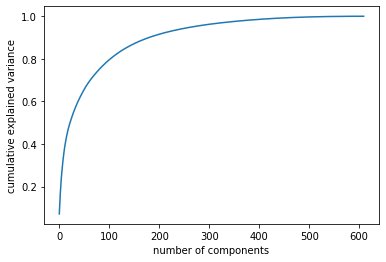

In [29]:
pca = sklearnPCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

The scree plot clearly indicates that the first 500 principal components contain the maximum information (variance) within the data. Note that the initial data set had approximately 9000 features which can now be narrowed down to just 500. Thus, you can now easily perform further analysis on the data since the redundant or insignificant variables are out. This is the power of dimensionality reduction.